In [1]:
from matplotlib import rc
from lmfit import Model



rc('text', usetex=False)
rc("font", family="serif")
import numpy as np #notwendige Pakete laden
import matplotlib.pyplot as plt
import matplotlib
import math
import matplotlib.ticker as ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, NullLocator)
import pandas as pd
from PIL import Image
from  matplotlib.patches import Rectangle

In [2]:
matplotlib.use("pgf")
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False,
    "figure.figsize": (6.48, 2.75),
    "pgf.texsystem": "pdflatex",
    "font.size": 13,
    "text.latex.preamble" :  r"\usepackage{amsmath} \usepackage[utf8]{inputenc} \usepackage[T1]{fontenc}\usepackage[output-decimal-marker={,}]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    "pgf.preamble": r"\usepackage{amsmath} \usepackage[utf8]{inputenc} \usepackage[T1]{fontenc}\usepackage[output-decimal-marker={,}]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    #r"\usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}"])
})

In [3]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % ('\\mathdefault{%s}' % self.format)
    

In [4]:
butterfly_image = np.load('butterfly_summ_26026_frames.npy')

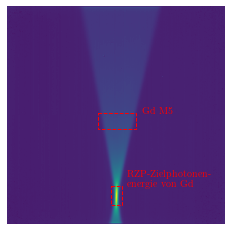

In [46]:
%matplotlib inline
fig = plt.figure()
axes = fig.gca()

axes.imshow(butterfly_image)
axes.axis('off')
axes.text(167+80, 196, 'Gd M5', color='red')
rect_gd = Rectangle((167, 196), 233-163, 196-167, linewidth=1, edgecolor='r', linestyle='--', facecolor='none')
axes.add_patch(rect_gd)
rect_tallie = Rectangle((190, 330), 20, 35, linewidth=1, edgecolor='red', linestyle='--', facecolor='none')
axes.text(190+30, 330, 'RZP-Zielphotonen-\nenergie von Gd', color='red')
axes.add_patch(rect_tallie)

In [47]:
fig.savefig('butterfly_latex.pgf', bbox_inches='tight', pad_inches=0.0)